 Training Dataset Loaded — Total Samples: 1000


,review_text,label
0,Received a defective item. The packaging was a...,Negative
1,Very happy with the purchase. The features are...,Positive
2,I had a great experience using this device. It...,Positive
3,Good value for money,Positive
4,The product exceeded all my expectations. From...,Positive



 Model Accuracy: 1.0

 Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        93
    Positive       1.00      1.00      1.00       107

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



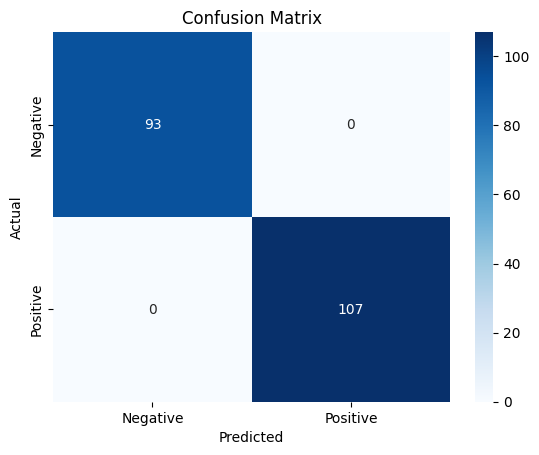


 Annotated Output (first 10 rows):


,review_text,predicted_label,confidence
0,Too slow and freezes often.,Negative,0.5329
1,Exceeded my expectations in every way.,Positive,0.9115
2,Works well but the battery drains quickly.,Positive,0.7635
3,Absolutely love this product!,Negative,0.5441
4,The packaging was horrible and arrived late.,Negative,0.9410
5,"Does the job, but not worth the price.",Negative,0.8734
6,Fast delivery and great customer support.,Positive,0.9065
7,Feels flimsy and cheaply made.,Negative,0.5329
8,Too slow and freezes often.,Negative,0.5329
9,Fantastic experience using it every day.,Positive,0.6133



 Annotated file saved at: C:\Users\jason\Documents\Annotated_Output.csv


In [12]:

!pip install pandas --quiet
!pip install numpy --quiet
!pip install scikit-learn --quiet
!pip install seaborn --quiet
!pip install matplotlib --quiet

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#Hey Guys!, please change the doc file path with the file that is used to train :-
labeled_file_path = r"C:\Users\jason\Documents\large_labeled_reviews.csv"
df = pd.read_csv(labeled_file_path)
print(f" Training Dataset Loaded — Total Samples: {len(df)}")
display(df.head())

X = df['review_text']
y = df['label']

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vect = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n Model Accuracy: {round(accuracy, 4)}\n")
print(" Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# and here, please change the doc file path with the file that needs to be labeled :-
unlabeled_file_path = r"C:\Users\jason\Documents\unlabeled_reviews.csv"  
unlabeled_df = pd.read_csv(unlabeled_file_path)

#Also make sure u have titled the column if the data needs to be labeled titled as review_text :-
if 'review_text' not in unlabeled_df.columns:
    print("ERROR: 'review_text' column not found in unlabeled file.")
else:
    X_unlabeled = vectorizer.transform(unlabeled_df['review_text'])
    predicted_labels = model.predict(X_unlabeled)
    confidences = model.predict_proba(X_unlabeled).max(axis=1)

    unlabeled_df['predicted_label'] = predicted_labels
    unlabeled_df['confidence'] = confidences.round(4)

    print("\n Annotated Output (first 10 rows):")
    display(unlabeled_df.head(10))

    #This is the file path u make to store the Annotated output guys :-
    output_path = r"C:\Users\jason\Documents\Annotated_Output.csv"
    unlabeled_df.to_csv(output_path, index=False)
    print(f"\n Annotated file saved at: {output_path}")
